In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.1.0


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('debit_fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#data['step'].value_counts()

In [7]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
notFraud = data[data['isFraud']==0]
isFraud = data[data['isFraud']==1]

In [11]:
isFraud.shape, notFraud.shape

((8213, 11), (6354407, 11))

In [12]:
notFraud = notFraud.sample(isFraud.shape[0])
notFraud.shape

(8213, 11)

In [13]:
isFraud.shape, notFraud.shape

((8213, 11), (8213, 11))

In [14]:
data = isFraud.append(notFraud, ignore_index=True)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [15]:
data.shape

(16426, 11)

In [16]:
data = data.drop(['step','nameOrig','nameDest','isFlaggedFraud'], axis=1)
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


In [17]:
# Get dummies
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)
# X head
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,1,0,0,0,1
1,181.0,181.0,0.0,21182.0,0.0,1,1,0,0,0
2,2806.0,2806.0,0.0,0.0,0.0,1,0,0,0,1
3,2806.0,2806.0,0.0,26202.0,0.0,1,1,0,0,0
4,20128.0,20128.0,0.0,0.0,0.0,1,0,0,0,1


In [19]:
#data['isFlaggedFraud'].value_counts()

In [20]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [22]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((13140, 9), (3286, 9), (13140,), (3286,))

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
X_train.shape

(13140, 9, 1)

### CNN Model

In [40]:
epochs = 50
model = Sequential()
model.add(Conv1D(64,2,activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 2, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 8, 64)             192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 64)             256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 128)            16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 128)            512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 256)           

In [43]:
#model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics = ['acc'])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss= 'binary_crossentropy', metrics=['accuracy'])

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    min_lr=0.00001,
    patience=2,
    verbose=1)

In [45]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test), callbacks=[early_stopping,reduce_lr])

Train on 13140 samples, validate on 3286 samples
Epoch 1/50
13140/13140 [==============================] - 16s 1ms/sample - loss: 0.4649 - accuracy: 0.7737 - val_loss: 0.3307 - val_accuracy: 0.8372
Epoch 2/50
13140/13140 [==============================] - 15s 1ms/sample - loss: 0.3149 - accuracy: 0.8518 - val_loss: 0.2175 - val_accuracy: 0.8950
Epoch 3/50
13140/13140 [==============================] - 15s 1ms/sample - loss: 0.2788 - accuracy: 0.8708 - val_loss: 0.2042 - val_accuracy: 0.9044
Epoch 4/50
13140/13140 [==============================] - 15s 1ms/sample - loss: 0.2590 - accuracy: 0.8794 - val_loss: 0.2042 - val_accuracy: 0.9005
Epoch 5/50
13140/13140 [==============================] - 15s 1ms/sample - loss: 0.2376 - accuracy: 0.8884 - val_loss: 0.1822 - val_accuracy: 0.9224
Epoch 6/50
13140/13140 [==============================] - 14s 1ms/sample - loss: 0.2263 - accuracy: 0.8990 - val_loss: 0.1755 - val_accuracy: 0.9163
Epoch 7/50
13140/13140 [==============================] -

In [86]:
def plot_learningCurve(history, epochs):
    #Plot Training and Validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('No of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training','Validation'], loc='lower right')
    plt.show()
    
    #Plot Training and Validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Loss')
    plt.xlabel('No of Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training','Validation'], loc='upper right')
    plt.show()

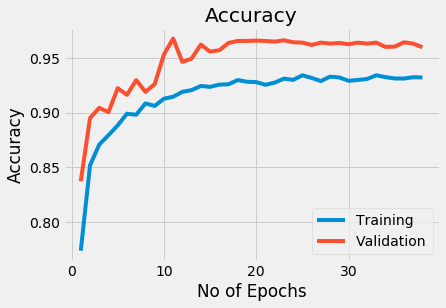

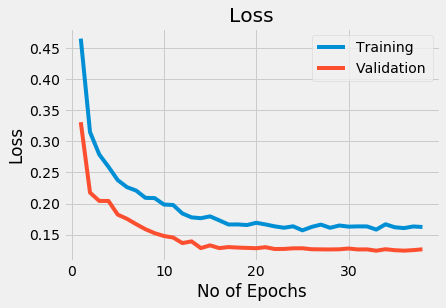

In [87]:
plot_learningCurve(history, 38)

In [50]:
final_loss, final_accuracy = model.evaluate(X_test,y_test)

3286/3286 [==============================] - 1s 184us/sample - loss: 0.1242 - accuracy: 0.9641


In [51]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.12
Final accuracy: 96.41%


In [63]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])

In [74]:
y_pred.shape ,y_test.shape

((3286,), (3286,))

In [76]:
y_pred = int(round(y_pred,3))

TypeError: type numpy.ndarray doesn't define __round__ method

In [78]:
target_names = ['not Fraud','isFraud']
print(classification_report(y_test, y_pred.round(), target_names= target_names))

              precision    recall  f1-score   support

   not Fraud       1.00      0.93      0.96      1643
     isFraud       0.94      1.00      0.97      1643

    accuracy                           0.96      3286
   macro avg       0.97      0.96      0.96      3286
weighted avg       0.97      0.96      0.96      3286

